# Code Lab 1: Loading and Displaying Data

### Dataset `readme.txt`

(formatted slightly nicer for sanity)

**Captions, Dataset Splits, and Human Annotations**

* `Flickr8k.token.txt` - the raw captions of the Flickr8k Dataset . The first column is the ID of the caption which is `image address # caption number`
* `Flickr8k.lemma.txt` - the [lemmatized](https://en.wikipedia.org/wiki/Lemmatisation) version of the above captions 
* `Flickr_8k.trainImages.txt` - The training images used in our experiments
* `Flickr_8k.devImages.txt` - The development/validation images used in our experiments
* `Flickr_8k.testImages.txt` - The test images used in our experiments


**`ExpertAnnotations.txt` is the expert judgments**

* The first two columns are the image and caption IDs.
* Caption IDs are `<image file name>#<0-4>`.
* The next three columns are the expert judgments for that image-caption pair.
* Scores range from 1 to 4:
* 1 indicating that the caption does not describe the image at all, a 2 indicating the caption describes minor aspects of the image but does not describe the image, a 3 indicating that the caption almost describes the image with minor mistakes, and a 4 indicating that the caption describes the image.


**`CrowdFlowerAnnotations.txt` contains the CrowdFlower judgments**

* The first two columns are the image and caption IDs.
* The third column is the percent of Yes, the fourth column is the total number of Yes, the fifth column is the total number of No.
* A Yes means that the caption describes the image (possibly with minor mistakes), while a No means that the caption does not describe the image.
* Each image-caption pair has a minimum of three judgments, but some may have more.

```
If you use this corpus / data:
Please cite: M. Hodosh, P. Young and J. Hockenmaier (2013) "Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics", Journal of Artifical Intellegence Research, Volume 47, pages 853-899
http://www.jair.org/papers/paper3994.html
```

In [1]:
# helper function

def print_long_list(long_list):
    """
    Prints the start, middle, and end of a long list
    """
    midpoint = int(len(long_list)/2)
    print(long_list[0])
    print(long_list[1])
    print("...")
    print(long_list[midpoint-1])
    print(long_list[midpoint])
    print("...")
    print(long_list[-2])
    print(long_list[-1], "; total =", len(long_list))

## Part 1: Load Images

If you had the images in a folder(`"./flickr8k/images"`), you would load them this way (refer to the code cell below)

However, today we're going to load the images "on-demand". This approach has an upside and downside:

* Upside: only download the images you're interested in
* Downside: latency when downloading the image

We'll revisit this in **Part 3**.

In [2]:
# 
# 

"""
import glob

IMAGES_DIR = "./flickr8k/images"
image_paths = glob.glob(IMAGES_DIR+"/*.jpg")
image_paths.sort()
print_long_list(image_paths)
"""

'\nimport glob\n\nIMAGES_DIR = "./flickr8k/images"\nimage_paths = glob.glob(IMAGES_DIR+"/*.jpg")\nimage_paths.sort()\nprint_long_list(image_paths)\n'

## Part 2: Load Annotations and Captions

In [3]:
# download annotations

import keras

ANN_URL = "https://s3-ap-southeast-1.amazonaws.com/deeplearning-mat/flickr8k.zip"
ANN_DIR = keras.utils.get_file("flickr8k.zip", ANN_URL, cache_subdir='datasets', extract=True)

ANN_DIR = ANN_DIR.replace(".zip","")

print("Dataset present at:", ANN_DIR)

Using TensorFlow backend.


Dataset present at: /home/jovyan/.keras/datasets/flickr8k


**Part A: Loading Annotations**

The annotations mark the quality of the captions

In [4]:
import csv

def load_good_expert_annotations(FILE_PATH):
    """
    Only load the annotations that all experts gave 3 or better
    """
    output = []
    with open(FILE_PATH, 'r') as f:
        annotations = csv.reader(f, delimiter='\t')
        for row in annotations:
            scores = [int(row[2]), int(row[3]), int(row[4])]
            if min(scores)>2:
                # all scores are 3 or better
                output.append(row[:2])
    return output


def load_good_crowd_annotations(FILE_PATH, threshold=0.8):
    """
    Only load the annotations that crowd-sourced "Yes" response > threshold
    Where threshold: 0 <= threshold <= 1; 0.5 = 50%
    """
    output = []
    with open(FILE_PATH, 'r') as f:
        annotations = csv.reader(f, delimiter='\t')
        # answer start
        for row in annotations:
            score = float(row[2])
            if score>threshold:
                output.append(row[:2])
        # answer end
    return output

**Extra tip unrelated to this exercise**

Sometimes the first row is a header (aka the column titles). We could skip a row by using `next(annotations)` since `annotations` is a iterator.

In [5]:
expert_ann = load_good_expert_annotations(ANN_DIR+"/captions/ExpertAnnotations.txt")
print_long_list(expert_ann)

['1107246521_d16a476380.jpg', '3582742297_1daa29968e.jpg#2']
['1119015538_e8e796281e.jpg', '229862312_1a0ba19dab.jpg#2']
...
['3085667865_fa001816be.jpg', '3631986552_944ea208fc.jpg#2']
['309687244_4bdf3b591f.jpg', '197107117_4b438b1872.jpg#2']
...
['925491651_57df3a5b36.jpg', '925491651_57df3a5b36.jpg#2']
['997722733_0cb5439472.jpg', '486917990_72bd4069af.jpg#2'] ; total = 593


Expected Output

```
['1107246521_d16a476380.jpg', '3582742297_1daa29968e.jpg#2']
['1119015538_e8e796281e.jpg', '229862312_1a0ba19dab.jpg#2']
...
['3085667865_fa001816be.jpg', '3631986552_944ea208fc.jpg#2']
['309687244_4bdf3b591f.jpg', '197107117_4b438b1872.jpg#2']
...
['925491651_57df3a5b36.jpg', '925491651_57df3a5b36.jpg#2']
['997722733_0cb5439472.jpg', '486917990_72bd4069af.jpg#2'] ; total = 593
```

In [6]:
crowd_ann = load_good_crowd_annotations(ANN_DIR+"/captions/CrowdFlowerAnnotations.txt")
print_long_list(crowd_ann)

['1056338697_4f7d7ce270.jpg', '1056338697_4f7d7ce270.jpg#2']
['1056338697_4f7d7ce270.jpg', '524105255_b346f288be.jpg#2']
...
['3080056515_3013830309.jpg', '3080056515_3013830309.jpg#2']
['308487515_7852928f90.jpg', '308487515_7852928f90.jpg#2']
...
['968081289_cdba83ce2e.jpg', '968081289_cdba83ce2e.jpg#2']
['997722733_0cb5439472.jpg', '872622575_ba1d3632cc.jpg#2'] ; total = 1323


Expected Output

```
['1056338697_4f7d7ce270.jpg', '1056338697_4f7d7ce270.jpg#2']
['1056338697_4f7d7ce270.jpg', '524105255_b346f288be.jpg#2']
...
['3080056515_3013830309.jpg', '3080056515_3013830309.jpg#2']
['308487515_7852928f90.jpg', '308487515_7852928f90.jpg#2']
...
['968081289_cdba83ce2e.jpg', '968081289_cdba83ce2e.jpg#2']
['997722733_0cb5439472.jpg', '872622575_ba1d3632cc.jpg#2'] ; total = 1323
```

**Part B: Loading Captions**

Each image has a few associated captions

In [7]:
def load_captions_to_list(FILE_PATH):
    output = []
    for line in open(FILE_PATH, 'r'):
        line = line.split("\t")
        # answer start
        image, caption = line[0], line[1].rstrip('\n').lower()
        # answer end
        output.append([image, caption])
    return output

In [8]:
captions_list = load_captions_to_list(ANN_DIR+"/captions/Flickr8k.token.txt")
print_long_list(captions_list)

['1000268201_693b08cb0e.jpg#0', 'a child in a pink dress is climbing up a set of stairs in an entry way .']
['1000268201_693b08cb0e.jpg#1', 'a girl going into a wooden building .']
...
['3106223494_52d4d2d75d.jpg#4', 'guy in santa suit wearing ninja mask and horns']
['3106340185_80d0cb770a.jpg#0', 'a man takes a picture out a window .']
...
['997722733_0cb5439472.jpg#3', 'a rock climber in a red shirt .']
['997722733_0cb5439472.jpg#4', 'a rock climber practices on a rock climbing wall .'] ; total = 40460


Expected Output

```
['1000268201_693b08cb0e.jpg#0', 'a child in a pink dress is climbing up a set of stairs in an entry way .']
['1000268201_693b08cb0e.jpg#1', 'a girl going into a wooden building .']
...
['3106223494_52d4d2d75d.jpg#4', 'guy in santa suit wearing ninja mask and horns']
['3106340185_80d0cb770a.jpg#0', 'a man takes a picture out a window .']
...
['997722733_0cb5439472.jpg#3', 'a rock climber in a red shirt .']
['997722733_0cb5439472.jpg#4', 'a rock climber practices on a rock climbing wall .'] ; total = 40460
```

In [9]:
import random

def list_to_dict(list_):
    output = {}
    for item in list_:
        output[item[0]] = item[1]
    return output

def get_random_key(dictionary):
    total_num = len(dictionary.keys())
    rand_num = random.randint(0, total_num)
    rand_key = list(dictionary.keys())[rand_num]
    return rand_key

def print_rand_example(dictionary):
    rand_key = get_random_key(dictionary)
    rand_caption = dictionary[rand_key]
    print("Image:  ", rand_key.split("#")[0])
    print("Caption:", rand_caption)

In [10]:
captions = list_to_dict(captions_list)
print_rand_example(captions)

Image:   136552115_6dc3e7231c.jpg
Caption: a helmeted man jumping off a rock on a mountain bike .


## Part 3: Display Images and Captions

In [11]:
import os
from requests import get
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def make_folder(path):
    """
    Create a directory (folder) unless it already exists.
    """
    os.makedirs(path, exist_ok=True)
    
def download_image_file(image_id, output_path):
    BASE_URL = "https://tlkh.design/downloads/flickr8k/images/"
    
    with open(output_path, "wb") as file:
        response = get(BASE_URL+image_id)
        file.write(response.content)
        
    return output_path

def display_rand_image(key):
    plt.style.use('ggplot')
    
    OUTPUT_FOLDER = "./flickr8k/images/"
    
    make_folder(OUTPUT_FOLDER)
    
    image_id = key.split("#")[0]
    image_path = download_image_file(image_id, OUTPUT_FOLDER+image_id)
    
    possible_caption_key = [image_id+"#"+str(i) for i in range(5)]
    
    label = ""
    
    for key in possible_caption_key:
        try:
            caption = captions[key]
            label += "\n"+caption
        except Exception as e:
            print(e)
            
    image = mpimg.imread(image_path)
    plt.grid(False)
    plt.imshow(image)
    x, y = int(image.shape[1]*1.1), int(image.shape[0]*0.5)
    plt.text(x, y, label, verticalalignment='top')
    plt.show()

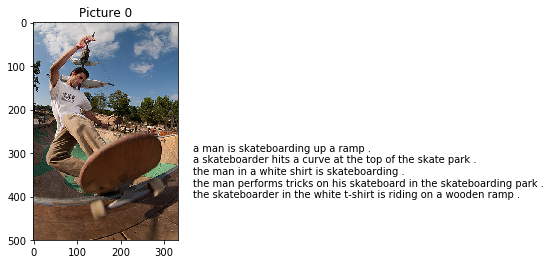

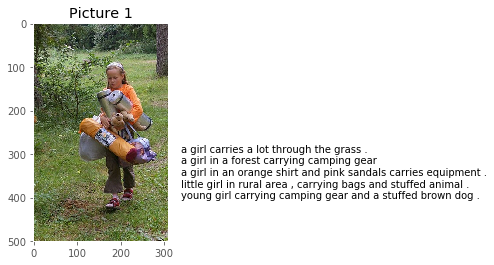

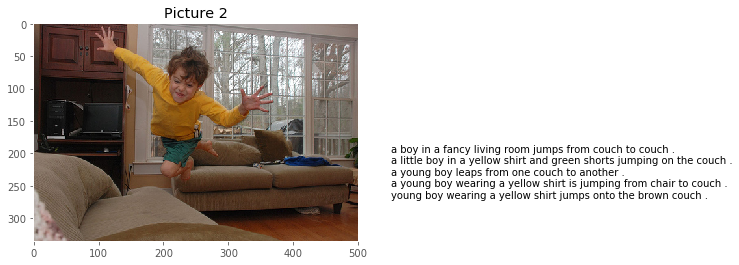

In [12]:
for i in range(3):
    plt.figure(i)
    plt.title("Picture "+str(i))
    display_rand_image(get_random_key(captions))
    print("\n")

In [13]:
def plot_distribution(data):
    plt.style.use('ggplot')
    
    # distribution of text lengths
    lengths = np.array([len(row[1].split(" ")) for row in data])
    summary = "mean: "+str(int(np.mean(lengths)))+" , min/max: "+str(np.min(lengths))+"/"+str(np.max(lengths))+" (95%: "+ str(round(np.percentile(lengths, 95), 2)) + ")"
    plt.figure(1, figsize=(10,6))
    plt.hist(lengths, bins='auto')
    plt.title("Distribution of text lengths")
    plt.xlabel("Text Length: " + summary); plt.ylabel("Examples")
    plt.axvline(np.mean(lengths), ls="-", color="k")
    plt.axvline(np.percentile(lengths, 95), ls="--", color="k")
    plt.show()

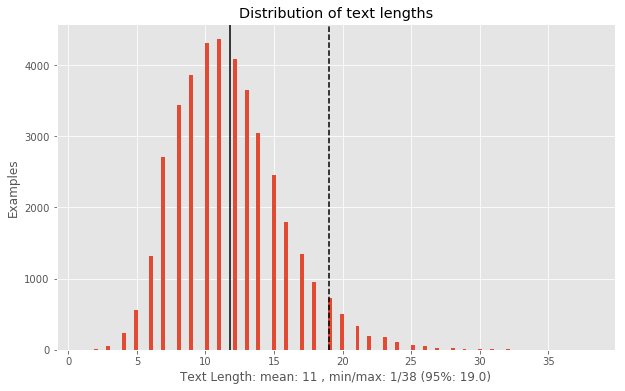

In [14]:
plot_distribution(captions_list)